In [75]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets,models,transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
from PIL import Image
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

In [76]:
train_transform=transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    
])

In [77]:
test_transform=transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

In [78]:
pwd

'C:\\Users\\SEEMA YADAV\\Desktop\\AI-MachineLearning\\03-CNN-Convolutional-Neural-Networks'

In [79]:
root='C:\\Users\\SEEMA YADAV\\Desktop\\CATS_DOGS'

train_data=datasets.ImageFolder(os.path.join(root,'train'),transform=train_transform)
test_data=datasets.ImageFolder(os.path.join(root,'test'),transform=test_transform)

In [80]:
train_data

Dataset ImageFolder
    Number of datapoints: 18743
    Root location: C:\Users\SEEMA YADAV\Desktop\CATS_DOGS\train
    StandardTransform
Transform: Compose(
               RandomRotation(degrees=[-10.0, 10.0], resample=False, expand=False)
               RandomHorizontalFlip(p=0.5)
               Resize(size=224, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [81]:
test_data

Dataset ImageFolder
    Number of datapoints: 6251
    Root location: C:\Users\SEEMA YADAV\Desktop\CATS_DOGS\test
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [82]:
torch.manual_seed(42)

train_loader=DataLoader(train_data,batch_size=10,shuffle=True)
test_loader=DataLoader(test_data,batch_size=10,shuffle=False)

In [83]:
train_classes=train_data.classes

In [84]:
train_classes

['CAT', 'DOG']

In [85]:
len(train_data)

18743

In [86]:
for images,labels in train_loader:
    break

In [87]:
images.size()

torch.Size([10, 3, 224, 224])

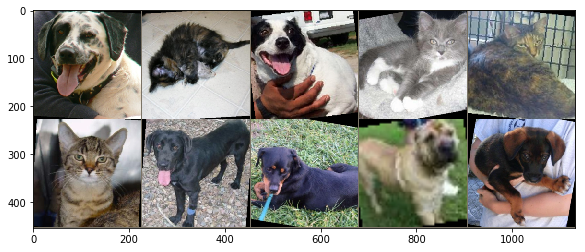

In [88]:
img=make_grid(images,nrow=5)
inv_normal=transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225])
img=inv_normal(img)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(img.numpy(),(1,2,0)))

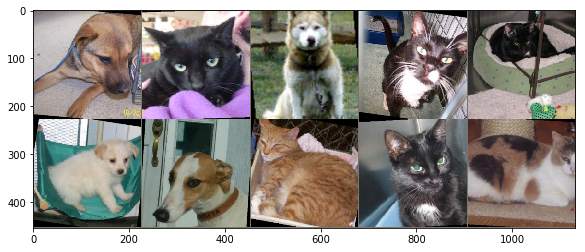

In [89]:
# Grab the first batch of 10 images
for images,labels in train_loader: 
    break

# Print the labels
#print('Label:', labels.numpy())
#print('Class:', *np.array([class_names[i] for i in labels]))

im = make_grid(images, nrow=5)  # the default nrow is 8

# Inverse normalize the images
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)

# Print the images
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));

In [90]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(54*54*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 54*54*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [91]:
torch.manual_seed(101)
CNNmodel = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNNmodel.parameters(), lr=0.001)
CNNmodel

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

In [92]:
images.size()

torch.Size([10, 3, 224, 224])

In [93]:
x=0
for param in CNNmodel.parameters():
    print(param.numel())
    x+=param.numel()
print('\n')
print('------------------')
print(x)

162
6
864
16
5598720
120
10080
84
168
2


------------------
5610222


In [94]:
import time
start_time=time.time()

epochs=3

max_trn_batch=800
max_tst_batch=300

train_losses=[]
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr=0
    tst_corr=0
    
    for b,(X_train,y_train) in enumerate(train_loader):
        
        if b==max_trn_batch:
            break
        b+=1
        
        y_pred=CNNmodel.forward(X_train)
        loss=criterion(y_pred,y_train)
        
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/8000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    
    with torch.no_grad():
         for b, (X_test, y_test) in enumerate(test_loader):
            # Limit the number of batches
            if b == max_tst_batch:
                break

            # Apply the model
            y_val = CNNmodel(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
        
    loss=criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)





cur_time=time.time()
total_time=cur_time-start_time
print(f'{total_time/60} minutes')

epoch:  0  batch:  200 [  2000/8000]  loss: 0.73078877  accuracy:  58.850%
epoch:  0  batch:  400 [  4000/8000]  loss: 0.49651179  accuracy:  61.625%
epoch:  0  batch:  600 [  6000/8000]  loss: 0.57903248  accuracy:  62.233%
epoch:  0  batch:  800 [  8000/8000]  loss: 0.41374630  accuracy:  63.388%
epoch:  1  batch:  200 [  2000/8000]  loss: 0.55997086  accuracy:  67.500%
epoch:  1  batch:  400 [  4000/8000]  loss: 0.56140256  accuracy:  69.125%
epoch:  1  batch:  600 [  6000/8000]  loss: 0.32551298  accuracy:  69.567%
epoch:  1  batch:  800 [  8000/8000]  loss: 0.83195955  accuracy:  69.975%
epoch:  2  batch:  200 [  2000/8000]  loss: 0.47683382  accuracy:  71.100%
epoch:  2  batch:  400 [  4000/8000]  loss: 0.61393470  accuracy:  72.750%
epoch:  2  batch:  600 [  6000/8000]  loss: 0.62891608  accuracy:  72.900%
epoch:  2  batch:  800 [  8000/8000]  loss: 0.29250228  accuracy:  73.263%
38.072800699869795 minutes


In [95]:
torch.save(CNNmodel.state_dict(),'CNNmodel.pt')

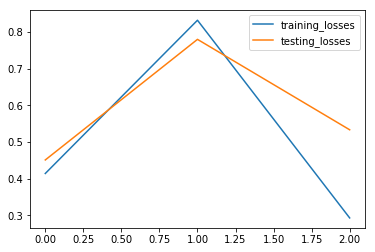

In [96]:
plt.plot(range(epochs),train_losses,label='training_losses')
plt.plot(range(epochs),test_losses,label='testing_losses')
plt.legend()

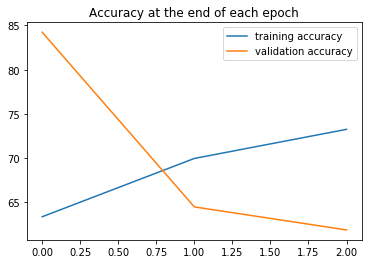

In [97]:
plt.plot([t/80 for t in train_correct], label='training accuracy')
plt.plot([t/30 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [98]:
test_correct[-1].item()*100/3000

61.9

In [100]:
Alexnet=models.(pretrained=True)

AttributeError: module 'torchvision.models' has no attribute 'alexNet'